# Netflix  Data:  Cleaning,  Analysis  and  Visualization

## About  Dataset
Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. This dataset is a cleaned version of the original version which can be found here. The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. This dataset will be cleaned with PostgreSQL and visualized with Tableau. The purpose of this dataset is to test my data cleaning and visualization skills. The cleaned data can be found below and the Tableau dashboard can be found here.

## Import  Required  Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/301.2 kB 375.8 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 590.8 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 958.4 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/301.2 kB 942.1 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.0 MB/s eta 0:00:00


## Load the Dataset

In [167]:
data = pd.read_csv(r'C:\Users\itsme\Downloads\netflix1.csv')

In [168]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [169]:
data.shape

(8790, 10)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [171]:
data.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [172]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [173]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

## Cleaning the data

In [174]:
data[['rating']].value_counts()

rating  
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [175]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [176]:
# Standardize text columns (e.g., 'type', 'rating', 'country')
data['type'] = data['type'].str.lower()
data['country'] = data['country'].str.lower()
data['rating'] = data['rating'].str.lower()
data['director'] = data['director'].str.lower()
data['listed_in'] = data['listed_in'].str.lower()

In [177]:
new_column_names=[]
for i in data.columns:
    new_column_names.append(i.capitalize())

In [178]:
data.columns=new_column_names

In [180]:
data.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added',
       'Release_year', 'Rating', 'Duration', 'Listed_in'],
      dtype='object')

In [181]:
# Convert 'date_added' to datetime format
data['Date_added'] = pd.to_datetime(data['Date_added'], errors='coerce')

In [182]:
# Extract numeric part from 'duration' and convert it to appropriate units
data['Duration'] = data['Duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0])*30) 
# Assuming 1 season = 30 mins for simplicity

In [102]:
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Listed_in
0,s1,movie,Dick Johnson Is Dead,kirsten johnson,united states,2021-09-25,2020,90,documentaries
1,s3,tv show,Ganglands,julien leclercq,france,2021-09-24,2021,30,"crime tv shows, international tv shows, tv act..."
2,s6,tv show,Midnight Mass,mike flanagan,united states,2021-09-24,2021,30,"tv dramas, tv horror, tv mysteries"
3,s14,movie,Confessions of an Invisible Girl,bruno garotti,brazil,2021-09-22,2021,91,"children & family movies, comedies"
4,s8,movie,Sankofa,haile gerima,united states,2021-09-24,1993,125,"dramas, independent movies, international movies"


In [183]:
data.duplicated().sum()

0

In [184]:
data.drop_duplicates(inplace=True)

In [185]:
data.isna().sum()

Show_id         0
Type            0
Title           0
Director        0
Country         0
Date_added      0
Release_year    0
Rating          0
Duration        0
Listed_in       0
dtype: int64

In [186]:
data['Show_id'].unique()

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'], dtype=object)

In [187]:
data['Show_id']=data['Show_id'].apply(lambda x:x.split('s')[1])

In [188]:
type(data['Show_id'][0])

str

In [189]:
type(data['Show_id'][0])

str

In [190]:
data['Show_id']=data['Show_id'].astype(int)

In [191]:
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
0,1,movie,Dick Johnson Is Dead,kirsten johnson,united states,2021-09-25,2020,pg-13,90,documentaries
1,3,tv show,Ganglands,julien leclercq,france,2021-09-24,2021,tv-ma,30,"crime tv shows, international tv shows, tv act..."
2,6,tv show,Midnight Mass,mike flanagan,united states,2021-09-24,2021,tv-ma,30,"tv dramas, tv horror, tv mysteries"
3,14,movie,Confessions of an Invisible Girl,bruno garotti,brazil,2021-09-22,2021,tv-pg,91,"children & family movies, comedies"
4,8,movie,Sankofa,haile gerima,united states,2021-09-24,1993,tv-ma,125,"dramas, independent movies, international movies"


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_id       8790 non-null   int32         
 1   Type          8790 non-null   object        
 2   Title         8790 non-null   object        
 3   Director      8790 non-null   object        
 4   Country       8790 non-null   object        
 5   Date_added    8790 non-null   datetime64[ns]
 6   Release_year  8790 non-null   int64         
 7   Rating        8790 non-null   object        
 8   Duration      8790 non-null   int64         
 9   Listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(6)
memory usage: 652.5+ KB


In [193]:
data.to_csv('Cleaned_Data',index=False)

In [194]:
df=pd.read_csv('Cleaned_Data')
df.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
0,1,movie,Dick Johnson Is Dead,kirsten johnson,united states,2021-09-25,2020,pg-13,90,documentaries
1,3,tv show,Ganglands,julien leclercq,france,2021-09-24,2021,tv-ma,30,"crime tv shows, international tv shows, tv act..."
2,6,tv show,Midnight Mass,mike flanagan,united states,2021-09-24,2021,tv-ma,30,"tv dramas, tv horror, tv mysteries"
3,14,movie,Confessions of an Invisible Girl,bruno garotti,brazil,2021-09-22,2021,tv-pg,91,"children & family movies, comedies"
4,8,movie,Sankofa,haile gerima,united states,2021-09-24,1993,tv-ma,125,"dramas, independent movies, international movies"


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       8790 non-null   int64 
 1   Type          8790 non-null   object
 2   Title         8790 non-null   object
 3   Director      8790 non-null   object
 4   Country       8790 non-null   object
 5   Date_added    8790 non-null   object
 6   Release_year  8790 non-null   int64 
 7   Rating        8790 non-null   object
 8   Duration      8790 non-null   int64 
 9   Listed_in     8790 non-null   object
dtypes: int64(3), object(7)
memory usage: 686.8+ KB


## Lets Visualize to get some insights from data

In [196]:
#Set Up Visualization Aesthetics,Set the style for the plots
sns.set(style="whitegrid")

#### Visualizing the Distribution of Content Types

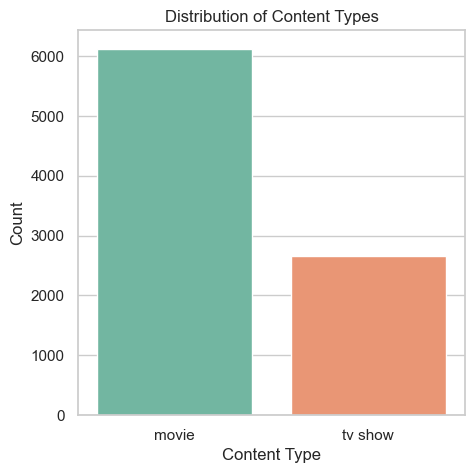

In [197]:
# Count the number of movies and TV shows
content_counts = df['Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(5,5))
sns.barplot(x=content_counts.index, y=content_counts.values, hue=content_counts.index, palette='Set2', legend=False)
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

####  Let's Analyze the Average Duration by Content Type

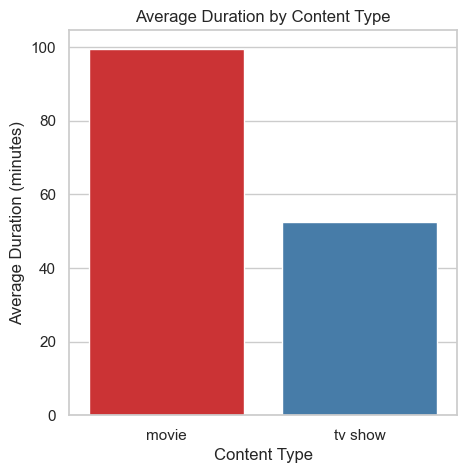

In [198]:
# Calculate the average duration for each content type
avg_duration = df.groupby('Type')['Duration'].mean().reset_index()

# Plot the average durations
plt.figure(figsize=(5, 5))
sns.barplot(x='Type', y='Duration', data=avg_duration, hue='Type', palette='Set1', legend=False)
plt.title('Average Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Duration (minutes)')
plt.show()


####  Let's explore the Most Common Genres

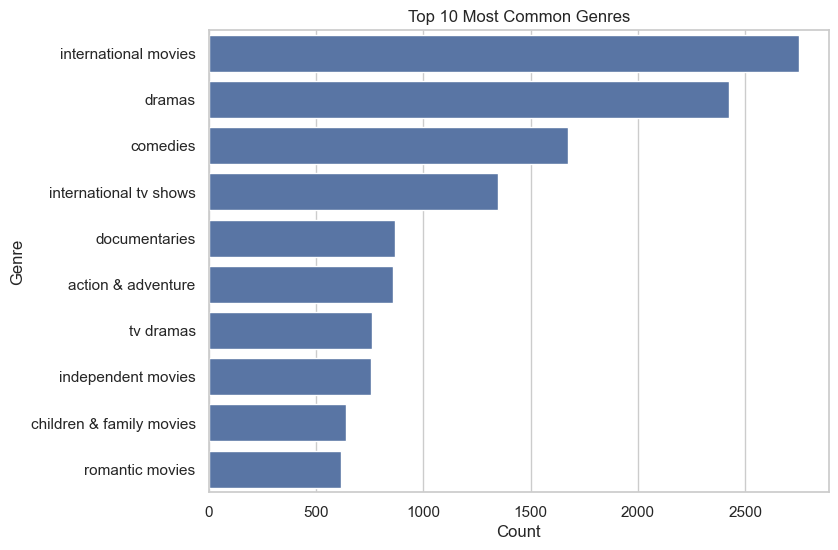

In [199]:
# Split the 'Listed_in' column into individual genres only if it's not empty
df['Listed_in'] = df['Listed_in'].apply(lambda x: x.split(', ') if x else [])

# Explode the 'Listed_in' column to have one genre per row
df_exploded = df.explode('Listed_in')

# Filter out any empty genres (if any were missed)
df_exploded = df_exploded[df_exploded['Listed_in'] != '']

# Count the occurrences of each genre
genre_counts = df_exploded['Listed_in'].value_counts().head(10)

# Plot the top 10 genres without the 'palette' argument
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


####  Examine the Number of Titles Added Over Time

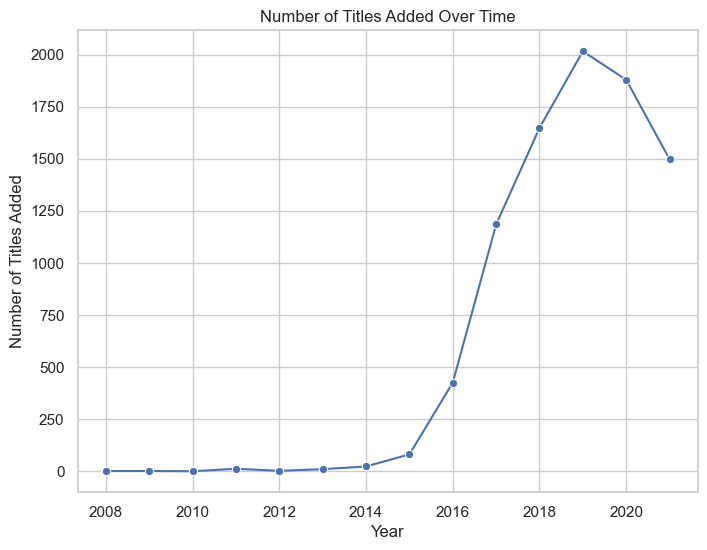

In [200]:
# Convert 'Date_added' to datetime format
df['Date_added'] = pd.to_datetime(df['Date_added'], errors='coerce')

# Extract the year from 'Date_added'
df['Year_added'] = df['Date_added'].dt.year

# Count the number of titles added each year
titles_added = df['Year_added'].value_counts().sort_index()

# Plot the number of titles added over time
plt.figure(figsize=(8, 6))
sns.lineplot(x=titles_added.index, y=titles_added.values, marker='o', color='b')
plt.title('Number of Titles Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()


#### Let's Identify the Top Countries by Content Availability

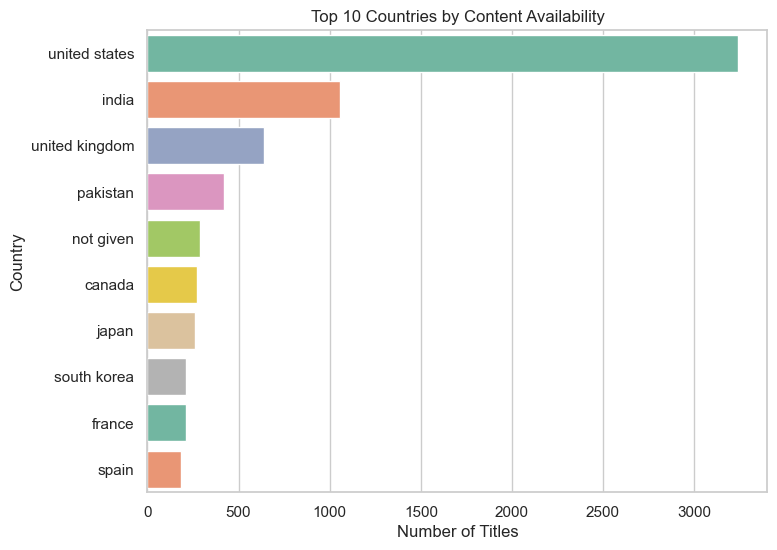

In [201]:
# Count the number of titles available in each country
country_counts = df['Country'].value_counts().head(10)

# Plot the top 10 countries with the 'hue' parameter set
plt.figure(figsize=(8, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='Set2', hue=country_counts.index, legend=False)
plt.title('Top 10 Countries by Content Availability')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


#### Analyze the Relationship Between Release Year and Rating

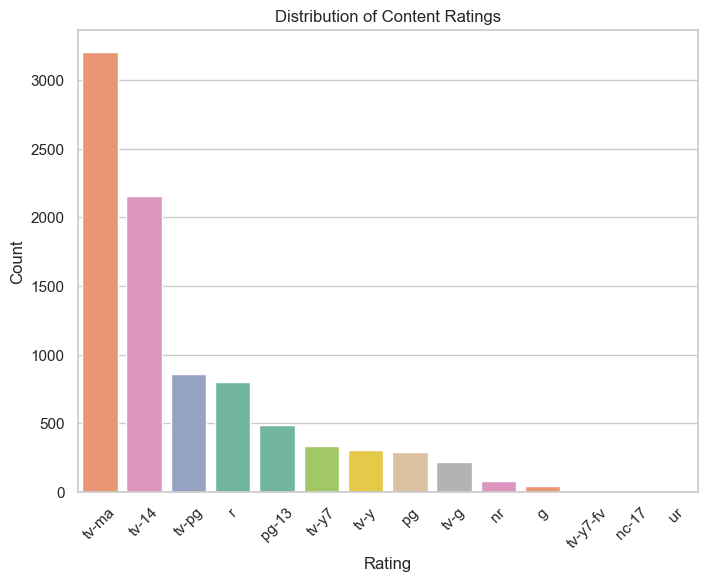

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each rating
rating_counts = df['Rating'].value_counts()

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating', order=rating_counts.index, hue='Rating', palette='Set2')  # Assign 'Rating' to 'hue'
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Create a Word Cloud of Titles

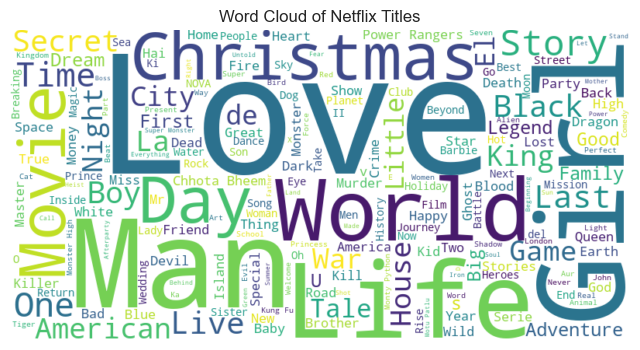

In [165]:
from wordcloud import WordCloud

# Combine all titles into a single string
text = ' '.join(df['Title'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()
